In [41]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta
import pandas as pd

def week_dataframe(day):
    db = DbConn()
    
    select_query = """
    select moviecd, audicnt 
    from boxoffice2  
    where  opendt +:day = dailydate and dailydate < TO_DATE('19/01/01', 'YY/mm/dd') and dailydate > TO_DATE('03/01/01', 'YY/mm/dd') 
    order by moviecd
    """
    params = {"day":day}
    select_result = db.execute(select_query,params)

    print("week_dataframe 작업 완료. -----")
    db.disconnect()
    return  select_result

day = 1

def movie2_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, max_audiacc, prod_max,director_avg,director_max, actors1_max, actors2_max, actors3_max, actors4_max, director_100cnt, prod_avg    
    from movie2
    where opendt < TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('03/01/01', 'YY/mm/dd') 
    and max_audiacc > 1000000
    
    order by moviecd
    """
    
#     and max_audiacc > 1000000
    
    select_result = pd.read_sql(select_query, db.connection)
    print("movie2_dataframe 작업 완료. -----")
    db.disconnect()
    return  select_result


def screen_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, scrncnt
    
    from boxoffice2
    where dailydate = opendt
    order by moviecd
    """
#     select_result = db.execute(select_query)
    select_result = pd.read_sql(select_query, db.connection)
    print("screen_dataframe 작업 완료. -----")
    db.disconnect()
    return  select_result

# def max_dataframe():
#     db = DbConn()
    
#     select_query = """
#     select moviecd,  max(audiacc)
#     from boxoffice 
#     group by moviecd
#     order by moviecd
#     """
#     select_result = db.execute(select_query)

#     print("누적 작업 완료. -----")
#     db.disconnect()
#     return  select_result


In [42]:
df_week= []
for i in range(0,day):
    df_week_column_name = ['MOVIECD', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )
df_week


week_dataframe 작업 완료. -----


[       MOVIECD  dpeople+0
 0     19820019     102565
 1     20030206       2002
 2     20030248        703
 3     20030316      23992
 4     20030332       1632
 5     20030350      13262
 6     20030371      63289
 7     20030380       1758
 8     20030394       3443
 9     20030395          6
 10    20030396          3
 11    20030397       3488
 12    20030398       4222
 13    20030399       3301
 14    20030402          3
 15    20030404       4143
 16    20030405        731
 17    20030408       6050
 18    20030410      21361
 19    20030411        344
 20    20030412        316
 21    20030413      16490
 22    20030420      10439
 23    20030421       2667
 24    20030424        134
 25    20030425        592
 26    20030426        714
 27    20030430      19141
 28    20030433      40396
 29    20030434       6336
 ...        ...        ...
 2787  20186501     162242
 2788  20186822       8615
 2789  20187427      87322
 2790  20187521       2557
 2791  20187641      61884
 

In [43]:
movie2_dataframe = movie2_dataframe()
movie2_dataframe.tail()

movie2_dataframe 작업 완료. -----


,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG
657,20185485,9945756,NaN,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,NaN
658,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0
659,20186281,1558872,NaN,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,NaN
660,20189262,1009427,NaN,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,NaN
661,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0


In [44]:
df_screen = screen_dataframe()
df_screen.tail()

screen_dataframe 작업 완료. -----


,MOVIECD,SCRNCNT
3019,20199923,116
3020,20199949,72
3021,20199950,1192
3022,20199951,653
3023,20199981,415


In [45]:
df = movie2_dataframe
df.tail()

,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG
657,20185485,9945756,NaN,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,NaN
658,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0
659,20186281,1558872,NaN,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,NaN
660,20189262,1009427,NaN,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,NaN
661,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0


In [46]:
df = pd.merge(df,df_screen, on='MOVIECD')

df.tail()

,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG,SCRNCNT
655,20185485,9945756,NaN,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,NaN,811
656,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0,1967
657,20186281,1558872,NaN,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,NaN,1016
658,20189262,1009427,NaN,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,NaN,682
659,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795


In [47]:
for i in df:
    df[i] = df[i].fillna(0)
    
df.tail()

,MOVIECD,MAX_AUDIACC,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG,SCRNCNT
655,20185485,9945756,0.0,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,0.0,811
656,20186202,12264813,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0,1967
657,20186281,1558872,0.0,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,0.0,1016
658,20189262,1009427,0.0,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,0.0,682
659,20189783,1124639,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795


In [48]:
df.keys()

Index(['MOVIECD', 'MAX_AUDIACC', 'PROD_MAX', 'DIRECTOR_AVG', 'DIRECTOR_MAX',
       'ACTORS1_MAX', 'ACTORS2_MAX', 'ACTORS3_MAX', 'ACTORS4_MAX',
       'DIRECTOR_100CNT', 'PROD_AVG', 'SCRNCNT'],
      dtype='object')

In [49]:
X = df.drop(['MOVIECD', 'MAX_AUDIACC'], axis=1)
X.tail()

,PROD_MAX,DIRECTOR_AVG,DIRECTOR_MAX,ACTORS1_MAX,ACTORS2_MAX,ACTORS3_MAX,ACTORS4_MAX,DIRECTOR_100CNT,PROD_AVG,SCRNCNT
655,0.0,3602177,9945756,9945756.0,9945756.0,9945756.0,9945756.0,5,0.0,811
656,14401147.0,7056767,14401147,14401147.0,14401147.0,14401147.0,12264813.0,5,7769992.0,1967
657,0.0,787563,1558872,3404477.0,1558872.0,1558872.0,1558872.0,1,0.0,1016
658,0.0,1009427,1009427,1009427.0,1009427.0,1009427.0,1009427.0,1,0.0,682
659,1124639.0,1124639,1124639,12264813.0,2352497.0,1867444.0,1124639.0,1,1124639.0,795


In [50]:
Y=df['MAX_AUDIACC']

In [51]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=5, learning_rate=0.15,  random_state=999)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test)

(1.0, 0.0)

In [53]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=10, learning_rate=0.15)
adb.fit(X_train,y_train)
adb.score(X_train,y_train),adb.score(X_test,y_test)

(0.023809523809523808, 0.0)

In [54]:
rfc = RandomForestClassifier(n_estimators=80, random_state=999)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(1.0, 0.0)

In [55]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rfc.fit(X_train, y_train) #랜덤포레스트의 컨퓨전 매트릭스

y_pred = rfc.predict(X_test)

# conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
#                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]', 'True[E]', 'True[F]', 'True[G]', 'True[H]', 'True[I]', 'True[J]', 'True[K]'],
#                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[E]', 'Pred[F]', 'Pred[G]', 'Pred[H]', 'Pred[I]', 'Pred[J]', 'Pred[K]'])
conMat = pd.DataFrame(confusion_matrix(y_test,y_pred))

 # 정확도, precision, recall, f1
conMat

,0,1,2,3,4,5,6,7,8,9,...,336,337,338,339,340,341,342,343,344,345
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
import joblib
joblib.dump(rfc, './max_people.pkl')

['./max_people.pkl']

In [79]:
test_model = joblib.load('./max_people.pkl')

In [80]:
test_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

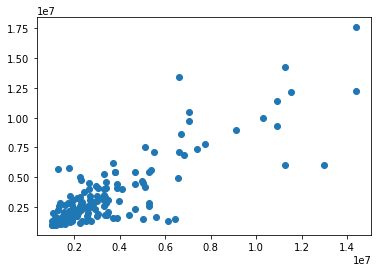

In [56]:
y_pred = rfc.predict(X_test) # 1600
y_test # 1724
plt.scatter(y_pred,y_test )
plt.show()

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


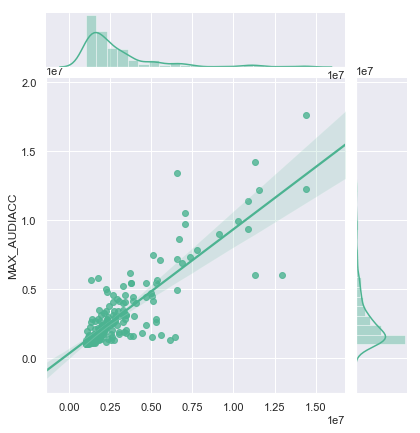

In [76]:
import seaborn as sns
# sns.set(style="ticks")
# sns.set(style="whitegrid")
sns.set(style="darkgrid")
g = sns.jointplot(y_pred, y_test, kind="reg", truncate=False, color="#4CB391")

In [77]:
y_pred

array([ 3469174,  1964593,  2496209,  2238760,  1769615,  2675992,
        1193820,  1454378,  3307911,  7387680,  1274628,  2256519,
        6573512,  2932953,  1384205, 14401147,  7057205,  1562647,
        2131414,  6126769,  1769615,  2098486,  3022766,  3348591,
        1822459,  1009427,  1151914,  1182723,  2905342,  3348591,
        3778456,  1792052,  1114723,  3004402,  2728692,  3373750,
        1630632,  3448489,  2296694,  5039519,  3307911,  2281314,
        6424662,  1333293,  5295056,  1076461,  1995730,  2077105,
        1183155,  1169885,  2820200,  1547318,  1228675,  1547318,
        1012011,  1825819,  5582956,  2135006,  2133724,  1148364,
        1064409,  4418994,  3252048,  1912205,  1964137,  3307911,
        1228675, 10912664,  2296694,  1911845,  2544096,  1190556,
        5039519,  1428617,  3373750,  3778456,  1042520,  3690298,
        1303412, 11287394,  1335123,  1102841,  2531834,  1739758,
        1887582,  5378683,  3022766,  1747480,  2354834,  3252

In [58]:
rfc.predict(X_test)

array([ 3469174,  1964593,  2496209,  2238760,  1769615,  2675992,
        1193820,  1454378,  3307911,  7387680,  1274628,  2256519,
        6573512,  2932953,  1384205, 14401147,  7057205,  1562647,
        2131414,  6126769,  1769615,  2098486,  3022766,  3348591,
        1822459,  1009427,  1151914,  1182723,  2905342,  3348591,
        3778456,  1792052,  1114723,  3004402,  2728692,  3373750,
        1630632,  3448489,  2296694,  5039519,  3307911,  2281314,
        6424662,  1333293,  5295056,  1076461,  1995730,  2077105,
        1183155,  1169885,  2820200,  1547318,  1228675,  1547318,
        1012011,  1825819,  5582956,  2135006,  2133724,  1148364,
        1064409,  4418994,  3252048,  1912205,  1964137,  3307911,
        1228675, 10912664,  2296694,  1911845,  2544096,  1190556,
        5039519,  1428617,  3373750,  3778456,  1042520,  3690298,
        1303412, 11287394,  1335123,  1102841,  2531834,  1739758,
        1887582,  5378683,  3022766,  1747480,  2354834,  3252

In [59]:
feat_labels = X.columns
feat_labels

Index(['PROD_MAX', 'DIRECTOR_AVG', 'DIRECTOR_MAX', 'ACTORS1_MAX',
       'ACTORS2_MAX', 'ACTORS3_MAX', 'ACTORS4_MAX', 'DIRECTOR_100CNT',
       'PROD_AVG', 'SCRNCNT'],
      dtype='object')

 1) DIRECTOR_MAX                   0.114041
 2) SCRNCNT                        0.130375
 3) DIRECTOR_AVG                   0.113241
 4) ACTORS1_MAX                    0.116309
 5) ACTORS2_MAX                    0.109664
 6) ACTORS3_MAX                    0.103794
 7) PROD_AVG                       0.080417
 8) DIRECTOR_100CNT                0.057269
 9) ACTORS4_MAX                    0.096499
10) PROD_MAX                       0.078390


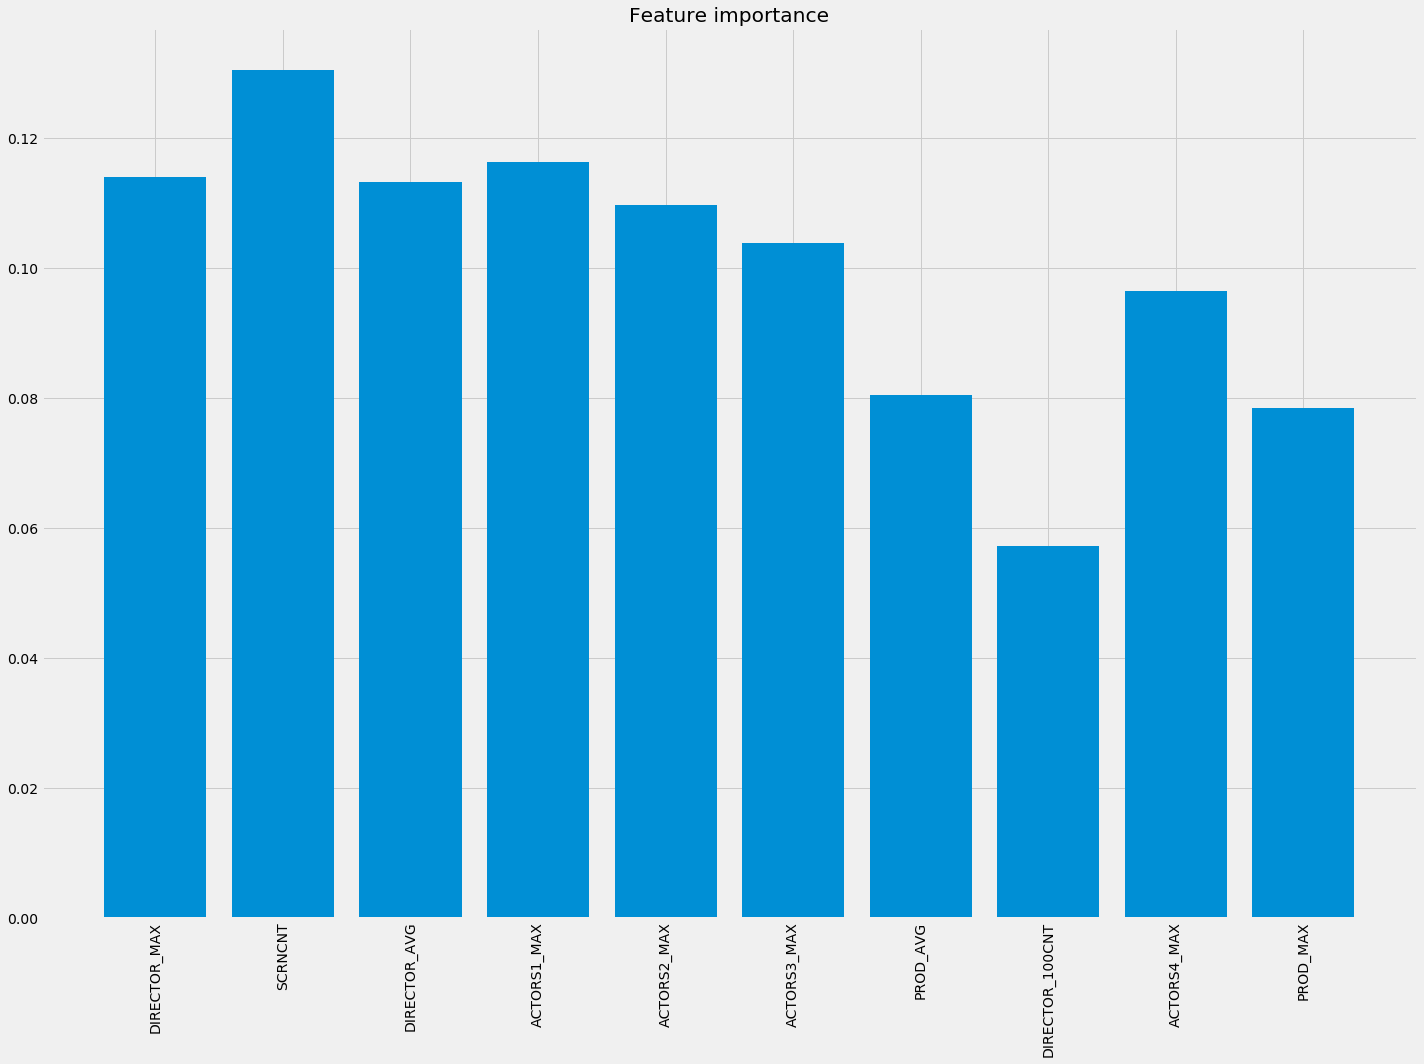

In [60]:
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,15))
                 
importances = rfc.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.savefig('randomforest.png')
plt.show()

In [ ]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음